In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 11 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 11 days


In [155]:
mi = lambda x: sin(x)
om = 0.2

def draw_n(n):
    X = numpy.random.uniform(0. ,6., n)
    X.sort()
    Y = array([numpy.random.normal(mi(x), om) for x in X])
    return X, Y

In [156]:
Xp,Y = draw_n(30)

In [173]:
alpha = lambda D: array([ exp(-(abs(Y[i] - mi(Xp[i])))/D) for i in range(Xp.size)])
D = 1.0
A = alpha(D)
T = array([0.2])
X = array([array([1, x, x**2, x**3, x**4]) for x in Xp])
Y.shape, X.shape, T.shape, A.shape

((30,), (30, 5), (1,), (30,))

In [174]:
T_Opt = (A.T*Y.T).dot(X).dot(inv(X.T.dot(X)))

In [213]:
C = logspace(0., 0.2, 5)
C

array([ 1.        ,  1.12201845,  1.25892541,  1.41253754,  1.58489319])

In [214]:
T_Opt2 = X.T.dot(A*Y.T).dot(inv(X.T.dot(diag(A).dot(X)) - diag(C)))

In [215]:
T_Opt.dot(X[0]), T_Opt2.dot(X[0])

(-0.15591630216276448, 0.087378425808141758)

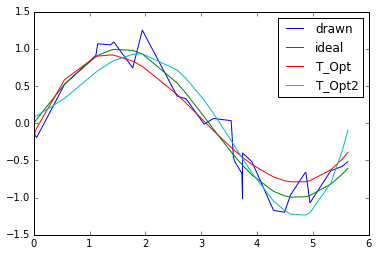

In [216]:
plot(Xp, Y, label='drawn')
plot(Xp, mi(Xp), label='ideal')
plot(Xp, [T_Opt.dot(x) for x in X], label='T_Opt')
plot(Xp, [T_Opt2.dot(x) for x in X], label = 'T_Opt2')
legend()

In [182]:
T_Opt.dot(X.T.dot(X))

(array([ -3.04422399e+00,  -3.15751322e+01,  -1.72546466e+02,
         -8.51412469e+02,  -4.13104161e+03]),
 array([  -1494.02455132,   79735.15533486, -191358.64136734,
         118756.90344246,  -10829.01275537]))